In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import polyfit

In [2]:
def filter_by(df_doc, name_doc):
    return df_doc[df_doc['cat'] == name_doc][['ds','y']].reset_index(drop=True)

In [3]:
def read_raw_csv(url,nrows):
    df_doc = pd.read_csv(
      url, 
      nrows=nrows,
      names = ['ds','cat','y'], 
      parse_dates = True )
    df_doc['ds'] = pd.to_datetime(df_doc['ds'])
    return df_doc

## Original Data

In [4]:
url = '../Data/daily_revenue_doctor.csv'
df_doc = read_raw_csv(url, 4167)
df_filter = filter_by(df_doc, 'Robert Caputo')
df_filter = df_filter.set_index('ds')

(1389, 1)


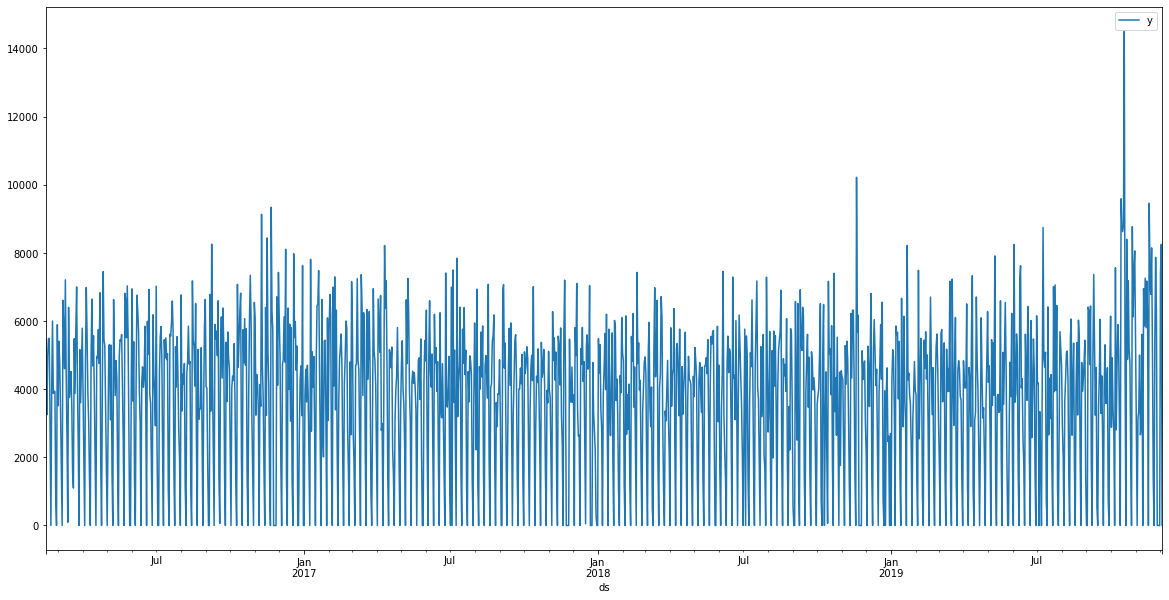

In [5]:
plt.rcParams["figure.figsize"] = (20,10)
df_filter.plot()
print(df_filter.shape)

## Seasonal Adjustment with Differencing

Difference method on the daily data

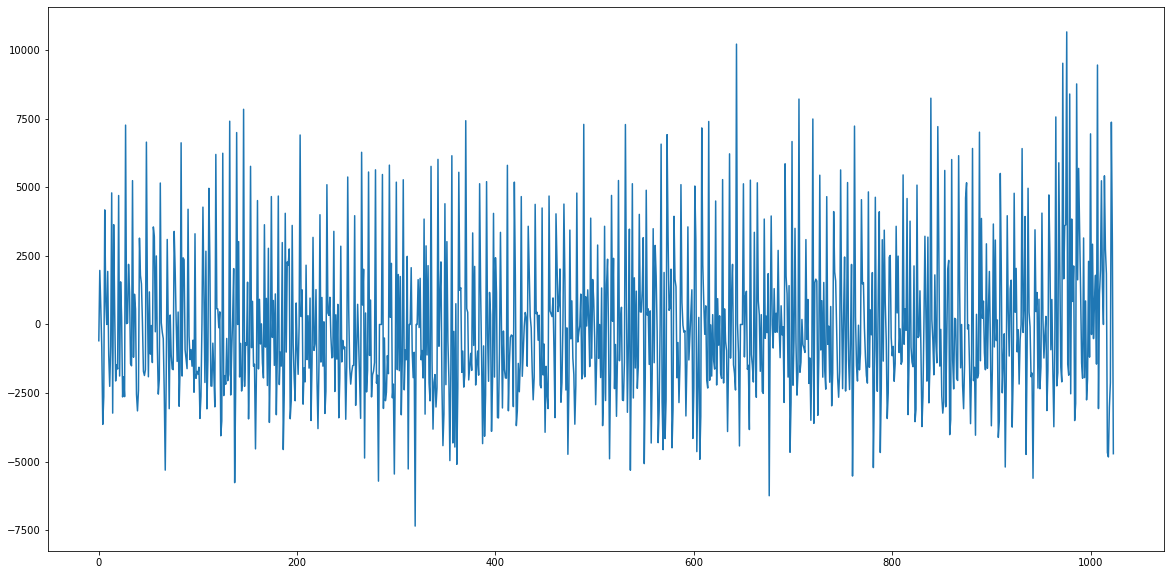

1024


In [65]:
X = df_filter.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
    value = X[i] - X[i - days_in_year]
    diff.append(value)
plt.plot(diff)
plt.show()
print(len(diff))

Resampling the dataset to a monthly average revenue

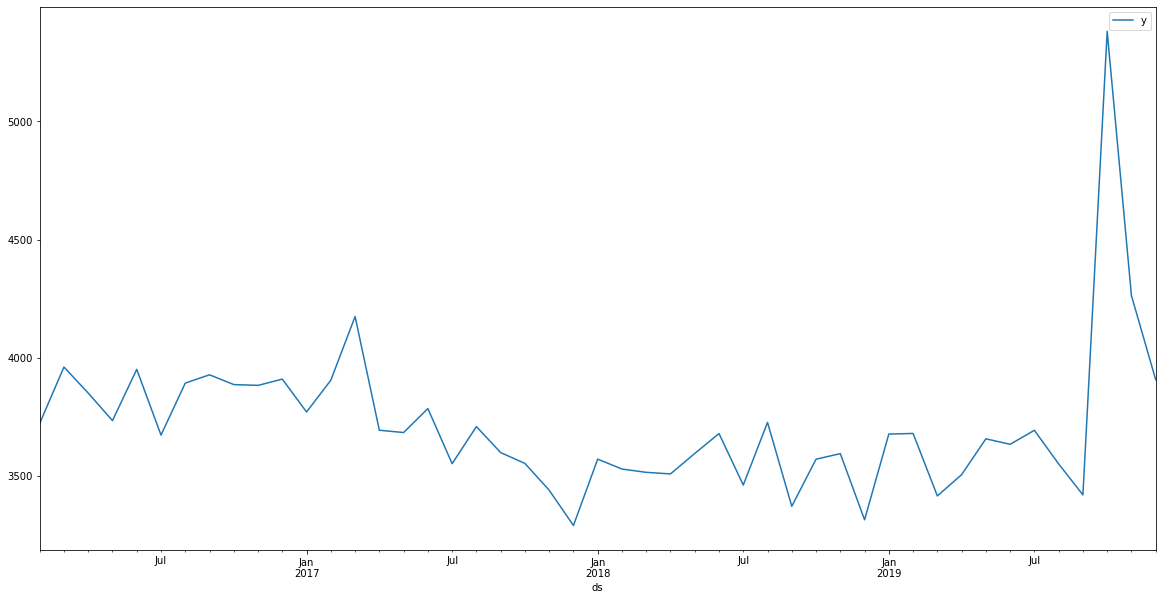

(47, 1)


In [63]:
resample = df_filter.resample('M')
monthly_mean = resample.mean()
monthly_mean.plot()
plt.show()
print(monthly_mean.shape)

Adjusted monthly average revenue dataset

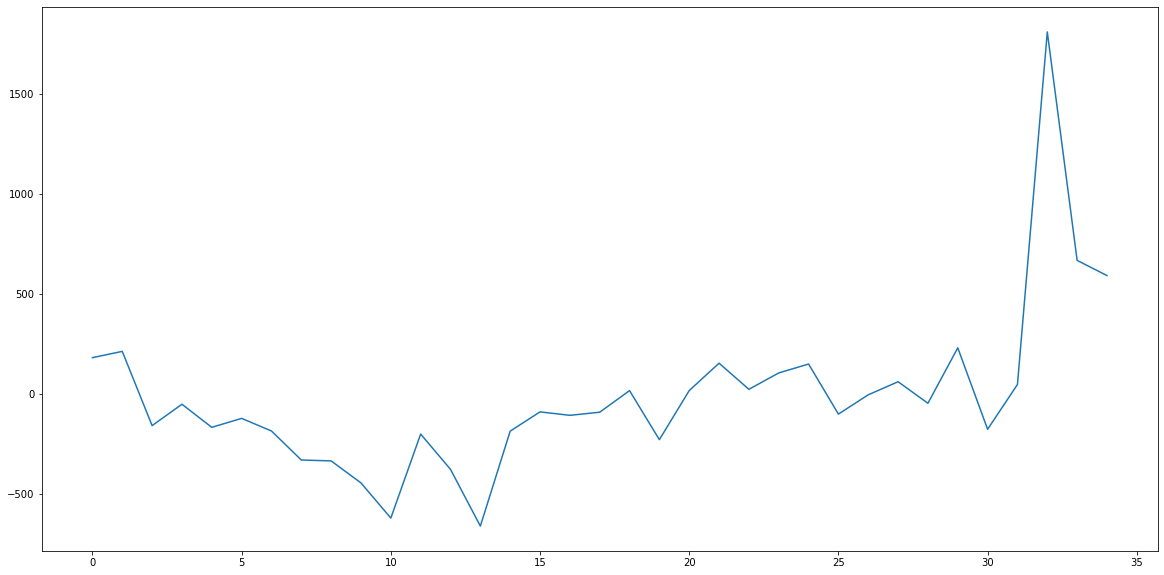

35


In [61]:
resample = df_filter.resample('M')
monthly_mean = resample.mean().values.tolist()
X = df_filter.values
diff = list()
months_in_year = 12
for i in range(months_in_year, len(monthly_mean)):
    value = monthly_mean[i][0] - monthly_mean[i - months_in_year][0]
    diff.append(value)
plt.plot(diff)
plt.show()
print(len(diff))

Adjusted daily average revenue dataset

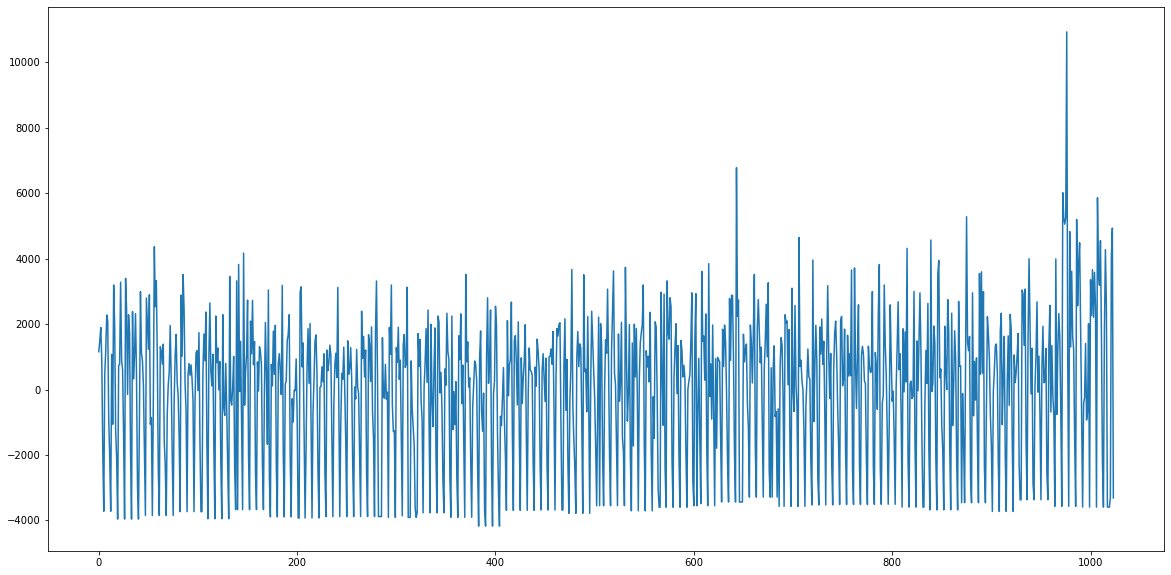

1024


In [62]:
X = df_filter.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
    month_str = str(df_filter.index[i].year-1)+'-'+str(df_filter.index[i].month)
    month_mean_last_year = df_filter[month_str].mean()
    value = X[i][0] - month_mean_last_year
    diff.append(value)
plt.plot(diff)
plt.show()
print(len(diff))